In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
N : int = 10000
T : int= 1000
INITIAL : int  = 100
Outcomes : np.ndarray = np.random.choice([-1,1],(N,T))
cumsum : np.ndarray = np.concatenate((np.full((N,1),INITIAL),Outcomes),axis = 1)
output : np.ndarray = np.cumsum(cumsum,1)
mask : np.ndarray = output <= 0
mask = np.cumsum(mask,1)
output[mask>0] = 0
means : np.ndarray= output.mean(0)
transposed : np.ndarray = np.transpose(output)
maxm : np.ndarray = (output[np.argmax(transposed[-1])])
minm : np.ndarray = (output[np.argmin(transposed[-1])])

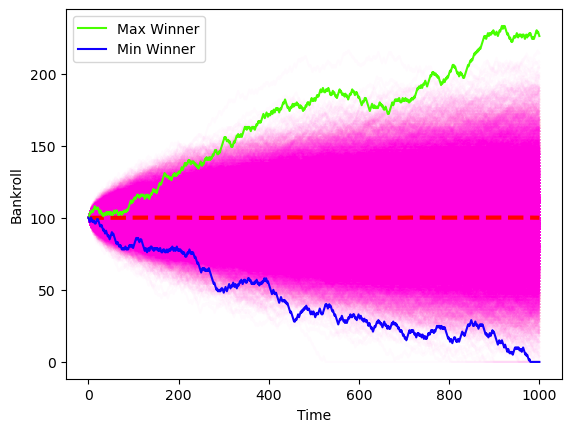

In [6]:
plt.plot(transposed,color="#ff00dd05")
plt.plot(means,color ="#ff0000ff",linestyle = "dashed",linewidth = '3')
plt.plot(maxm,color ="#48ff00ff",label = "Max Winner")
plt.plot(minm,color ="#1100ffff",label = "Min Winner")
plt.xlabel("Time")
plt.ylabel("Bankroll")
plt.legend()
plt.show()

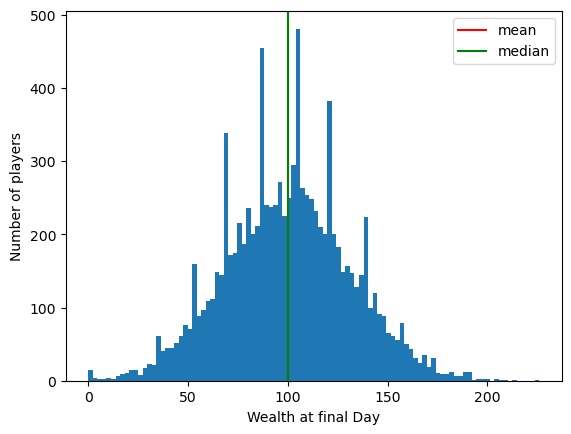

In [7]:
plt.hist(transposed[-1],100)
mean : float = means[-1]
median : int= np.median(transposed[-1])
plt.axvline(mean,color = "red",label = "mean")
plt.axvline(median,color = "green",label = "median")
plt.xlabel("Wealth at final Day")
plt.ylabel("Number of players")
plt.legend()
plt.show()

A series of fair tosses follow the binomial distribution. 
> The Lindeberg-Lévy Central Limit Theorem is a foundational probability theorem stating that the sum (or average) of many independent, identically distributed (i.i.d.) random variables, each with finite mean and variance, will itself be approximately normally distributed, regardless of their original distribution

The expected value of the distribution still remains the same.  The variance is higher when the number of tosses is large as it depends on it. 


In [ ]:
from numba import njit
N = 10000
T = 1000
INITIAL = 100
Outcomes = np.random.choice([-1, 1], (N, T))

def simulate_py(Outcomes, INITIAL):
    N, T = Outcomes.shape
    cumsum = np.concatenate((np.full((N, 1), INITIAL), Outcomes), axis=1)
    output = np.cumsum(cumsum, axis=1)
    mask = output <= 0
    mask = np.cumsum(mask, axis=1)
    output[mask > 0] = 0
    means = output.mean(axis=0)
    transposed = output.T
    maxm = output[np.argmax(transposed[-1])]
    minm = output[np.argmin(transposed[-1])]
    return means, maxm, minm


@njit
def simulate_nb(Outcomes, INITIAL):
    N, T = Outcomes.shape
    output = np.empty((N, T + 1), dtype=np.int64)
    ot = np.empty((T+1,N),dtype=np.int64)
    running = np.full(N, INITIAL, dtype=np.int64)
    mask = np.ones(N, dtype=np.bool_) 
    ot[0] = running
    for j in range(T):
        running[mask] = running[mask] + Outcomes[mask, j]
        mask &= (running > 0)
        ot[j + 1] = running
        
    output = ot.T
    means = np.zeros(T + 1, dtype=np.float64)
    for i in range(N):
        means += output[i]
    means /= N
    maxm = output[np.argmax(ot[-1])]
    minm = output[np.argmin(ot[-1])]
    return means, maxm, minm

t0 = time.time()
py_means, py_maxm, py_minm = simulate_py(Outcomes, INITIAL)
t_py = time.time() - t0
print("Python time:", t_py)

simulate_nb(Outcomes, INITIAL)
t0 = time.time()
nb_means, nb_maxm, nb_minm = simulate_nb(Outcomes, INITIAL)
t_nb = time.time() - t0
print("Numba time:", t_nb)


Python time: 0.4837305545806885
Numba (warm) time: 0.5472438335418701


No speed up achieved, due to the absence of functions like cumsum and other that forced to use other parallelisation routes.